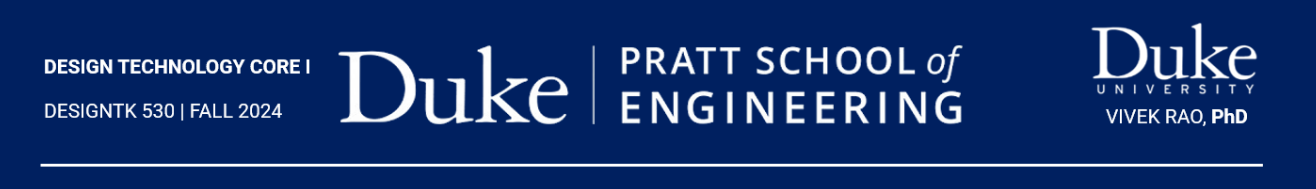

# **Assignment I-13   ||   Final Mini-Project**

### **I. Pip Installing Packages Specifically for This Assignment**

In [1]:
!pip install ucimlrepo

## **II. Importing Essential Libraries for Data Manipulation, Analysis and Visualization**

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt

from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import json
import random
import math
from IPython.display import Image, display, Latex

# AI/ML Tasks [Supervised & Unsupervised Learning]

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
import statsmodels.stats.power as smp
from statsmodels.stats.multitest import multipletests

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **1.1 Research Area**: <br> *Enhancing the University Application Journey of Undergraduate and Graduate Students all Around the World*



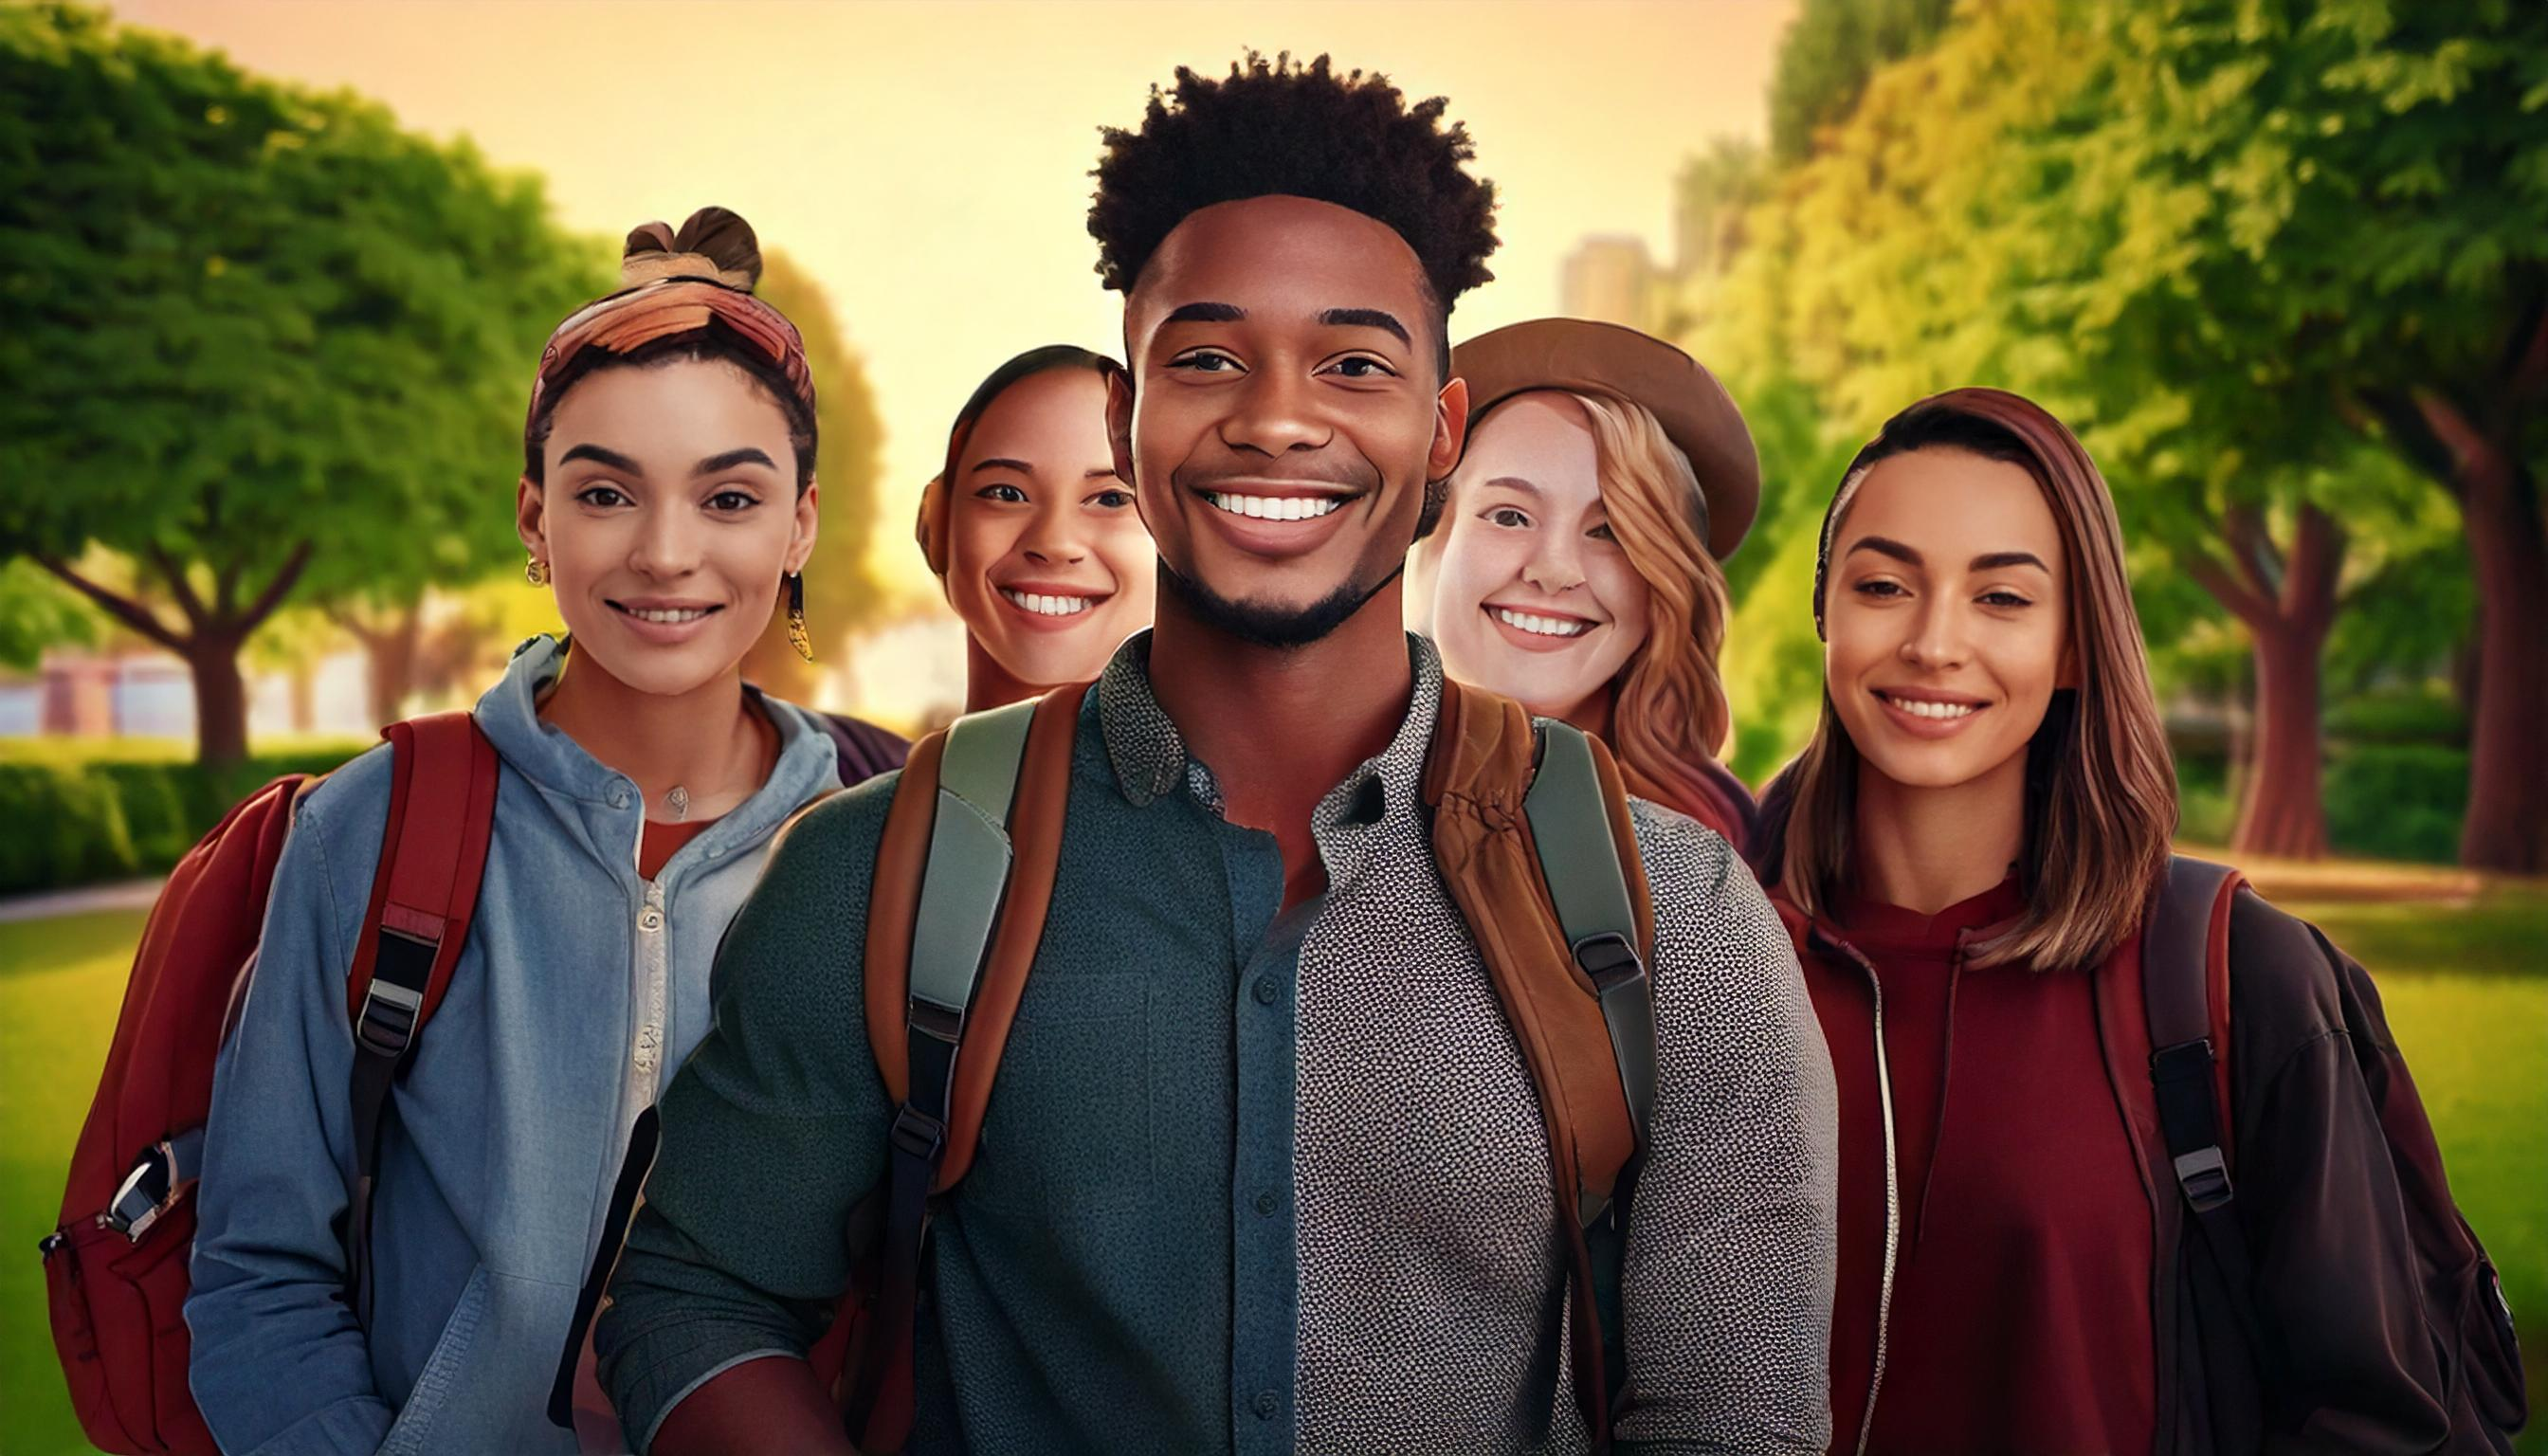

In [23]:
display(Image(filename='images/DTK530_Image.jpg', width=1000, height=500))

Image generated by [Adobe Firefly](https://firefly.adobe.com/)



---

<br>

### **1.1.1 Research Brief**

This research project aims to leverage the **[2023 QS World University Ranking Dataset](https://www.kaggle.com/datasets/tahirrfarooqq/2023-qs-world-university-ranking)** from Kaggle to develop a **Streamlit web app** focusing on the journey and experiences of **undergraduate and graduate students** all over the world (especially internationals - students not being aware of best practices for getting into schools outside their home country). The project will analyze key factors influencing their decisions when applying to schools and securing scholarships, offering data-driven insights into **application success rates, scholarship opportunities, and institutional criteria**. Python will be utilized for data analysis, and the **Gemini LLM API** will enhance user interactivity, making the app an informative resource for prospective students.

<br>

### **1.1.2 Research Goal**

The primary goal of this research project is to explore the university application scene and provide undergraduate and graduate students in the world and in my case, U.S. to improve their journey from application to enrollment. The overarching idea is to provide actionable insights for students (who might want to study outside their home country) to navigate the university 'foreign' application process, understand institutional dynamics, and make informed decisions regarding scholarships and school selection.

Specific objectives include:
1. Analyze how international student intake rates at various institutions influence application success and guide students in selecting schools aligned with their goals.
2. Identify institutional offerings (programs, funding options) that enhance students' chances of acceptance.
3. Develop a **Streamlit web app** that delivers personalized insights, supported by **Gemini LLM API** for real-time guidance or a 'place-to-start-from' on selecting suitable institutions and increasing scholarship potential.
4. The complexity of the university application system can be overwhelming, and providing data-driven insights can improve student success rates.
5. Institutions can benefit from understanding these trends to improve their recruitment strategies and ensure a positive student experience.

By utilizing the **[2023 QS World University Ranking Dataset](https://www.kaggle.com/datasets/tahirrfarooqq/2023-qs-world-university-ranking)**, this project aims to provide a comprehensive tool to support potential undergraduate and graduate students (all over the world) in making strategic, well-informed decisions throughout their application process.

<br>

<br>

### **1.1.3 Why Does This Need to Be Addressed?**

Addressing the experiences and challenges of international graduate students applying to institutions all over the world is crucial for several reasons:

1. **Complex Application Processes**: Navigating the university application system can be overwhelming due to varying requirements, and data-driven tools can simplify decision-making.
2. **Informed School Selection**: Understanding the impact of international student intake rates and institutional offerings allows students to target schools that best meet their academic and financial needs.
3. **Enhanced Decision-Making**: A tailored web app providing real-time insights ensures students have the resources to make well-informed choices, improving their overall journey.
4. **Institutional Benefits**: Schools can also leverage these insights to refine their recruitment strategies, creating a more supportive environment for international students.

By addressing these needs, this research will empower students with the knowledge and tools they need to successfully navigate their educational journey in the outisde their homes (if preferred) while also supporting institutions in enhancing their global student outreach.

<br>

---

## **2.1 Data Assessing, Cleaning, Organizing and Exploring:**

In [5]:
# Sourcing the '2023 QS World University Ranking Dataset' to explore and perform some analysis regarding enhancing the journey of International Graduate Students in the US

qs2023_worlduni_rank_data = pd.read_csv('C:/Users/micha/Desktop/Assign 13/dtk530_i13_finproject/i13/datasets/raw/2023_qs_world-uni_rank.csv')

# No of rows
qs2023_worlduni_rank_data_rows = qs2023_worlduni_rank_data.shape[0]
# No of columns
qs2023_worlduni_rank_data_columns = qs2023_worlduni_rank_data.shape[1]
# Get the values
print(qs2023_worlduni_rank_data_rows,'\n',qs2023_worlduni_rank_data_columns)

qs2023_worlduni_rank_data.info()
# qs2023_worlduni_rank_data.describe()

# Showing first 30 rows of table
qs2023_worlduni_rank_data.head(30)

1422 
 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
5,6,California Institute of Technology (Caltech),US,United States,96.5,28,87.1,58,100.0,3,...,4,99.8,75,85.1,134,73.0,425,98.8,24,97.0
6,7,Imperial College London,UK,United Kingdom,98.3,24,99.7,10,99.5,34,...,84,100.0,55,100.0,13,98.1,20,88.8,76,97.0
7,8,UCL,UK,United Kingdom,99.4,14,98.6,16,97.6,51,...,119,99.2,87,100.0,14,100.0,2,90.3,71,95.0
8,9,ETH Zurich - Swiss Federal Institute of Techno...,CH,Switzerland,98.6,18,91.3,51,74.2,164,...,18,100.0,24,98.0,59,96.2,56,91.1,64,93.6
9,10,University of Chicago,US,United States,99.2,16,92.2,46,92.9,71,...,79,81.6,214,76.0,176,89.6,170,98.2,30,93.2


The `qs2023_worlduni_rank_data` dataframe initially looks good, that is, most the columns are of the right type.

<br>

However, below are three things that need to be rectified.
- **[Task 1]** First and foremost, if we are to conisder these columns - `er score`, `fsr score`, `cpf score`, `ifr score&rank`, `isr score&rank`, `irn score&rank`, `ger score&rank`, they have NaN values and I have to cater for it.
- **[Task 2]** Skimming through the dataset, I will need to remove the `score scaled` column, as it has a very low number of values (less than half of the total dataset row count).
- **[Task 3]** I would have to rename some of the column headers to fit the research goal I am trying to achieve. For example, `ar score` can be renamed to `Academic Reputation Score`.
- **[Task 4]** Lastyly and also stemming from Task 1, there are `30 columns` but from the research I am doing, I wouldn't need some of them so I would need to drop some. For example, `rank` values for all columns with a score (except the overall rank) - the focus is more on identifying patterns through scores as with ranks it'll be very easy to detect with is best.

### Let's do some cleaning!

To cater for the NaN values, I will:
- Fill the NaN values in the `score` sections with mean score value to still minimize the effect it can have in skewing the data's distribution.
- Fill the NaN values in the `rank` sections with 0 becuase we can assume no [NaN value = 0] could mean no ranking which won't affect the data significantly.

In [6]:
# Fill NaN values in score columns with the mean of each column
score_columns = ['er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']
for col in score_columns:
    mean_score = qs2023_worlduni_rank_data[col].mean()
    qs2023_worlduni_rank_data[col] = qs2023_worlduni_rank_data[col].fillna(mean_score)

qs2023_worlduni_rank_data

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.000000,54,90.000000,109,96.1,58,100.000000,3,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.000000,60,96.300000,70,99.5,6,100.000000,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.800000,74,60.300000,235,96.3,55,100.000000,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.800000,101,98.400000,54,99.9,3,100.000000,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.900000,228,66.900000,212,100.0,1,100.000000,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.700000,601+,26.545348,NaN,8.1,601+,26.186809,NaN,NaN
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.300000,601+,1.300000,601+,8.8,601+,30.900000,403,NaN
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.200000,601+,2.800000,601+,51.1,601+,26.186809,NaN,NaN
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,31.659517,NaN,26.545348,NaN,7.5,601+,8.700000,601+,NaN


In [7]:
# Filling NaN values in rank columns with 0
rank_columns = ['ifr rank', 'isr rank', 'irn rank', 'ger rank']
for col in rank_columns:
    qs2023_worlduni_rank_data[col] = qs2023_worlduni_rank_data[col].fillna(0)

qs2023_worlduni_rank_data

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.000000,54,90.000000,109,96.1,58,100.000000,3,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.000000,60,96.300000,70,99.5,6,100.000000,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.800000,74,60.300000,235,96.3,55,100.000000,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.800000,101,98.400000,54,99.9,3,100.000000,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.900000,228,66.900000,212,100.0,1,100.000000,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.700000,601+,26.545348,0,8.1,601+,26.186809,0,NaN
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.300000,601+,1.300000,601+,8.8,601+,30.900000,403,NaN
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.200000,601+,2.800000,601+,51.1,601+,26.186809,0,NaN
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,31.659517,0,26.545348,0,7.5,601+,8.700000,601+,NaN


**[Task 2]**
- Correcting all mispelt country names
  - From skimming through the `1421` columns of `qs2023_worlduni_rank_data`, I realized the `score scaled` column needs to be drop as it won't be relevant for my study due to the number of data points it has.

In [8]:
# Dropping the `score scaled` column
qs2023_worlduni_rank_data = qs2023_worlduni_rank_data.drop(columns=['score scaled'])

**[Task 3]**
- Renaming relevant columns

In [9]:
#Let's view the old column names
print(*qs2023_worlduni_rank_data.columns, sep='\n')

Rank
institution
location code
location
ar score
ar rank
er score
er rank
fsr score
fsr rank
cpf score
cpf rank
ifr score
ifr rank
isr score
isr rank
irn score
irn rank
ger score
ger rank


In [10]:
# Renaming all the columns of qs2023_worlduni_rank_data

qs2023_worlduni_rank_data = qs2023_worlduni_rank_data.rename(columns={
    'Rank': 'World Rank',
    'institution': 'University Name',
    'location': 'Country',
    'location code': 'Country Code',
    'ar score': 'Academic Reputation Score',
    'ar rank': 'Academic Reputation Rank',
    'er score': 'Employer Reputation Score',
    'er rank': 'Employer Reputation Rank',
    'fsr score': 'Faculty-Student Ratio Score',
    'fsr rank': 'Faculty-Student Ratio Rank',
    'cpf score': 'Faculty Research Output Score', # Citations per Faculty
    'cpf rank': 'Faculty Research Output Rank',
    'ifr score': 'International Faculty Ratio Score',
    'ifr rank': 'International Faculty Ratio Rank',
    'isr score': 'International Students Ratio Score',
    'isr rank': 'International Students Ratio Rank',
    'irn score': 'Research Network Diversity Score', # International Research Network
    'irn rank': 'Research Network Diversity Rank',
    'ger score': 'Graduate Employment Rate Score', # Graduate Employment Rate
    'ger rank': 'Graduate Employment Rate Rank'
})

# Print new column names
print(*qs2023_worlduni_rank_data.columns, sep='\n')

World Rank
University Name
Country Code
Country
Academic Reputation Score
Academic Reputation Rank
Employer Reputation Score
Employer Reputation Rank
Faculty-Student Ratio Score
Faculty-Student Ratio Rank
Faculty Research Output Score
Faculty Research Output Rank
International Faculty Ratio Score
International Faculty Ratio Rank
International Students Ratio Score
International Students Ratio Rank
Research Network Diversity Score
Research Network Diversity Rank
Graduate Employment Rate Score
Graduate Employment Rate Rank


**[Task 4]**
- Dropping unnecessary columns

In [11]:
# List of columns to drop
columns_to_drop = [ 'Academic Reputation Rank',
                    'Employer Reputation Rank',
                    'International Faculty Ratio Rank',
                    'Faculty-Student Ratio Rank',
                    'Faculty Research Output Rank', # Citations per Faculty
                    'International Students Ratio Rank',
                    'Research Network Diversity Rank', # International Research Network
                    'Graduate Employment Rate Rank' # Graduate Employment Rate
                  ]

# Drop the specified columns
qs2023_worlduni_rank_data = qs2023_worlduni_rank_data.drop(columns=columns_to_drop, errors='ignore')

# Displaying the 'qs2023_worlduni_rank_data' dataframe after dropping columns
qs2023_worlduni_rank_data.head()

,World Rank,University Name,Country Code,Country,Academic Reputation Score,Employer Reputation Score,Faculty-Student Ratio Score,Faculty Research Output Score,International Faculty Ratio Score,International Students Ratio Score,Research Network Diversity Score,Graduate Employment Rate Score
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [12]:
# Displaying the new values for the rows and columns
print(qs2023_worlduni_rank_data.shape[0],'\n',qs2023_worlduni_rank_data.shape[1])

# Getting relevant information on the newly cleaned datframe
qs2023_worlduni_rank_data.info()

1422 
 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   World Rank                          1422 non-null   int64  
 1   University Name                     1422 non-null   object 
 2   Country Code                        1422 non-null   object 
 3   Country                             1422 non-null   object 
 4   Academic Reputation Score           1422 non-null   float64
 5   Employer Reputation Score           1422 non-null   float64
 6   Faculty-Student Ratio Score         1422 non-null   float64
 7   Faculty Research Output Score       1422 non-null   float64
 8   International Faculty Ratio Score   1422 non-null   float64
 9   International Students Ratio Score  1422 non-null   float64
 10  Research Network Diversity Score    1422 non-null   float64
 11  Graduate Employment Rate Score   

<br>

---

<br>

## **Step 1: What Is The Approach and Objective?**

**Step 1: What Is The Approach and Objective?**

* **Approach:** This project aims to build a Streamlit web app to guide students in navigating the university application process. It leverages the 2023 QS World University Ranking Dataset to provide data-driven recommendations and insights through machine learning means - KMeans Clustering model. Gemini LLM API will aid in the feature extraction from the user input and also enhances user interaction by offering real-time guidance.

* **Objective:**  The primary objective is to empower students (particularly those applying outside their home country) to make informed decisions regarding university selection and scholarships. This is achieved by:
    * Analyzing elements/criteria affecting application success.
    * Identifying universities, their programs and funding options that will aid student's chances.
    * Developing a Streamlit app with Gemini LLM API integration for personalized insights and guidance.
    * In summary, simplify the complex application process with data-driven insights.

In [13]:
# FLOW CHART FOR EASY EXPLANATION GOES HERE

## **Step 2: Why I Selected these Three Features From the Dataset and How it Allows for a Seamless Approach and Objective Realization**

The three features selected are:

  - **Academic Reputation Score:** Represents the university's global standing and prestige.
  - **International Students Ratio Score:** Indicates the university's openness to international students, basically, diversity.
  - **Graduate Employment Rate Score:** Reflects the university's track record of placing graduates in good jobs, impacting post-graduation career prospects.

These features directly align with the project's objective of providing insights for informed university selection. They offer a well-rounded picture of a university's academic excellence, international student focus, and career outcomes for graduates.

## **Step 3: Design Rationale and Justification**

**Step 3: Design Rationale and Justification**

The rationale:
- Based on the user's inputs below, the app leverages KMeans clustering to recommend the top 3 universities that best match the student's input preferences. Additionally, Gemini LLM API integration provides users with the ability to ask follow-up questions for more specific insights into the recommended universities.

The Streamlit web app is designed with a user-friendly interface, allowing students to input their preferences regarding:
- **Desired location (optional):** Streamlines the search based on geographic preference.
- **Academic Reputation Score:** Students can specify their desired level of academic prestige.
- **International Students Ratio Score:** Students can indicate their preference for universities with a high international student population.
- **Graduate Employment Rate Score:** Students can prioritize universities with strong graduate employment records.

The app utilizes a user-input text area which allows for a non-rigid query experience so users can easily out their preferences in words.
I will discuss more about the app design rationale later in the document.

##  **-------- END OF PART 13a (Presentation done in class to show though process) ----------**



## With the `qs2023_worlduni_rank_data` ready, approach and objective defined, I believe we are ready to apply <mark>building blocks of AI/ML, that is, Clustering (KMeans)</mark> and <mark>LLM (Gemini API)</mark> via a <mark>Streamlit app</mark> to <mark>interact with the user, extract key features, recommend, get visualizations</mark> and <mark>provide additional insights</mark>.

<br>

---

<br>

## **Step 4: Loading, Analyzing and Encoding the Dataset to Prepare for Clustering**

In [14]:
# Loading the dataset again for testing purposes here
data = pd.read_csv('datasets/clean/qs2023_worlduni_rank_cleandata.csv')

# Previewing the dataset
data.head()

,Unnamed: 0,World Rank,University Name,Country Code,Country,Academic Reputation Score,Employer Reputation Score,Faculty-Student Ratio Score,Faculty Research Output Score,International Faculty Ratio Score,International Students Ratio Score,Research Network Diversity Score,Graduate Employment Rate Score
0,0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


Looking at the data above and my objective, having the values in 0-100 format might not be ideal as the model may wonder which of the different values to give more weight hence, encoding the scores into degrees (Low, High etc.) will enhance the clustering process.

In [15]:
# Defining the ranges between 0-100
the_ranges = [0,20,40,60,80,100]
the_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
the_map_dict = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2, 
    'High': 3,
    'Very High': 4
}

# Creating the bins to allocate their respective labels
data['Academic Reputation Score Encoded'] = pd.cut( data['Academic Reputation Score'],bins = the_ranges , include_lowest = True, labels = the_labels)
data['International Students Ratio Score Encoded'] = pd.cut( data['International Students Ratio Score'],bins = the_ranges , include_lowest = True, labels = the_labels)
data['Graduate Employment Rate Score Encoded'] = pd.cut( data['Graduate Employment Rate Score'],bins = the_ranges , include_lowest = True, labels = the_labels)


# Mapping the encoded values to a new column which will aid in the clustering
data['Academic Reputation Score Encoded'] = data['Academic Reputation Score Encoded'].map(the_map_dict)
data['International Students Ratio Score Encoded'] = data['International Students Ratio Score Encoded'].map(the_map_dict)
data['Graduate Employment Rate Score Encoded'] = data['Graduate Employment Rate Score Encoded'].map(the_map_dict)


#3 - Printing the encoded dataframe
print_df = data.loc[:, ['University Name', 'Academic Reputation Score Encoded', 'International Students Ratio Score Encoded', 'Graduate Employment Rate Score Encoded']].tail(10)
random_rows = print_df.sample(n=10, random_state=42)
random_rows

,University Name,Academic Reputation Score Encoded,International Students Ratio Score Encoded,Graduate Employment Rate Score Encoded
1420,University of Craiova,0,1,0
1413,Universidad Católica de Temuco,0,1,0
1417,Universidad Nacional Autónoma de Honduras (UNAH),0,1,1
1412,Universidad Católica de Santiago de Guayaquil,0,0,1
1419,Université Mohammed V de Rabat,0,0,1
1414,Universidad de Tarapaca,0,1,0
1421,University of Oradea,0,0,0
1416,Universidad Michoacana de San Nicolás de Hidalgo,0,1,0
1415,Universidad Mayor de San Simón Cochabamba,0,1,0
1418,Universidad Tecnológica de Bolívar,0,0,1


Let's make it into a function and view our main dataset with the encoded values

In [16]:
def recode_the_cols(data):
    the_ranges = [0,20,40,60,80,100]
    the_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    the_map_dict = {
        'Very Low': 0,
        'Low': 1,
        'Medium': 2, 
        'High': 3,
        'Very High': 4
    }

    data['Academic Reputation Score Encoded'] = pd.cut( data['Academic Reputation Score'],bins = the_ranges , include_lowest = True, labels = the_labels)
    data['International Students Ratio Score Encoded'] = pd.cut( data['International Students Ratio Score'],bins = the_ranges , include_lowest = True, labels = the_labels)
    data['Graduate Employment Rate Score Encoded'] = pd.cut( data['Graduate Employment Rate Score'],bins = the_ranges , include_lowest = True, labels = the_labels)

    data['Academic Reputation Score Encoded'] = data['Academic Reputation Score Encoded'].map(the_map_dict)
    data['International Students Ratio Score Encoded'] = data['International Students Ratio Score Encoded'].map(the_map_dict)
    data['Graduate Employment Rate Score Encoded'] = data['Graduate Employment Rate Score Encoded'].map(the_map_dict)
    
    return data

In [17]:
recode_the_cols(data)

,Unnamed: 0,World Rank,University Name,Country Code,Country,Academic Reputation Score,Employer Reputation Score,Faculty-Student Ratio Score,Faculty Research Output Score,International Faculty Ratio Score,International Students Ratio Score,Research Network Diversity Score,Graduate Employment Rate Score,Academic Reputation Score Encoded,International Students Ratio Score Encoded,Graduate Employment Rate Score Encoded
0,0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,4,4,4
1,1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,4,4,4
2,2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,4,3,4
3,3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,4,4,4
4,4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0,1,1
1418,1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0,0,1
1419,1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0,0,1
1420,1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0,1,0


## **Step 5: Addressing Multicollinearity via Correlation Matrix**

Before proceeding to apply the KMeans Clustering model, let's tackle the topic of multicollinearity.

Multicollinearity refers to a high correlation between features, which can impact clustering performance. In this case, the chosen features (Academic Reputation, International Student Ratio, and Graduate Employment Rate) are likely to have some degree of correlation. However, given the focus on capturing a holistic picture of a university (prestige, international openness, career outcomes), it might won't hurt to proceed without explicitly addressing multicollinearity as I am looking for different values from the user to recommend a good school for them.

## **Step 6: Applying the Clustering Model (KMeans) While Selecting a Suitable K via the Elbow Method**

In [18]:
# Preparing the data for clustering
# Select features for clustering
features = data[['Academic Reputation Score Encoded', 'International Students Ratio Score Encoded', 'Graduate Employment Rate Score Encoded']]

NB: Since the scores have been encoded plus they have the same ranges (encoded from '0 to 100' to '0, 1, 2s'), there will be no need scaling the features

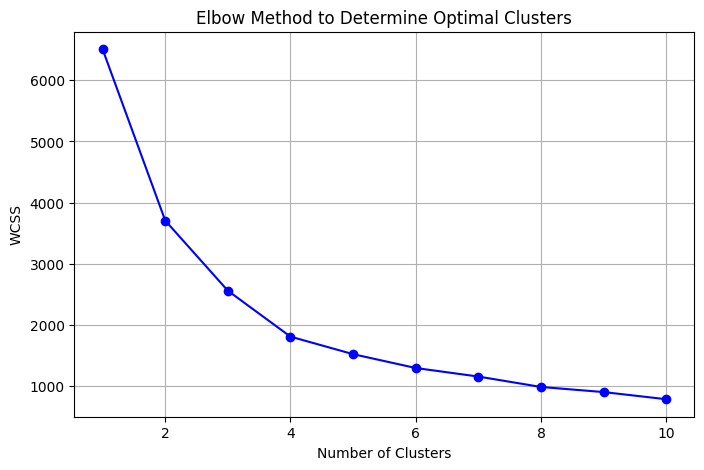

In [19]:
# Step 3: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Determining the Optimal K:** To identify the optimal number of clusters (k), I employed the elbow method.
 In my case, I reasoned that 25 (5 possible encoded values/tags for each of the 3 features) could be a suitable k (as opposed to '4' from the above graph) based on the number of encoding categories, that is, there is the likelihood to have 5 by 5 by 5 combinations from the user.
I experimented with k=25, and I was able to get good results which speaks to the model's performance.

See `app.py` code for results.

**KMeans Clustering:** My plan is to use the KMeans clustering algorithm to group universities into a predefined number of clusters (k) based on their similarity in terms of the encoded features. I went for my intuition and rationale against the elbow method because through my implementation it suggested a k value which didn't allow me to view all the encoded values/data points.

## **Step 8: Developing and Testing the App**


To develop the University Recommendation and Insights App via Streamlit, the app was going to have the following functionalities:
1. **User Input:** A user-friendly interface allows students to input their preferences regarding desired location, academic reputation score, international student ratio score, and graduate employment rate score.
2. **Feature Extraction:** The user's input is processed using natural language processing (NLP) techniques to extract the relevant features and their corresponding values.
3. **Clustering Analysis via KMeans model:** The extracted features are encoded and fed into the KMeans clustering model to determine the most suitable cluster for the user's preferences.
4. **University Recommendation:** The app recommends the top 3 universities from the identified cluster, prioritizing those with the highest scores in the user's preferred features.
5. **Additional Insights:** The app provides additional information about the recommended universities, such as their top programs, scholarship opportunities, and unique information.
6. **Gemini LLM API Integration:** The Gemini LLM API is integrated to a.) support the NLP and b.) enable users to ask follow-up questions about the recommended universities.




###  **-------------------------------- Main refined and working code in app.py ---------------------------------**



##  **----------------- END OF PART 13b but main code in app.py ------------------**



#### Click [here](https://uni-recommend-app.streamlit.app/) to access my application.
 > #### *Streamlit Website App fully functioning*